In [7]:
!pip install kaggle

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c cifar-10

100% 715M/715M [00:07<00:00, 192MB/s]
100% 715M/715M [00:07<00:00, 105MB/s]


In [10]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [11]:
from zipfile import ZipFile
file_name = 'cifar-10.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [12]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.6/413.6 kB 10.6 MB/s eta 0:00:00


In [13]:
import py7zr
archieve = py7zr.SevenZipFile('train.7z', mode='r')
archieve.extractall()
archieve.close()

In [14]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [15]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [16]:
filenames = os.listdir('/content/train')

In [17]:
type(filenames)

list

In [18]:
print(filenames[0:5])

['10854.png', '15185.png', '16915.png', '19758.png', '26507.png']


Label Processing

In [19]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [20]:
labels_df.shape

(50000, 2)

In [21]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [22]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [23]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [24]:
 labels_dictionary = {'airplane' :0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

In [25]:
lables = [labels_dictionary[item] for item in labels_df['label']]


In [26]:
labels_df['lables']  = lables

In [27]:
labels_df.head()

,id,label,lables
0,1,frog,6
1,2,truck,9
2,3,truck,9
3,4,deer,4
4,5,automobile,1


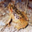

In [28]:
import cv2
from google.colab.patches import cv2_imshow
img =  cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [29]:
id_list = list(labels_df['id'])

In [30]:
id_list[-5:]

[49996, 49997, 49998, 49999, 50000]

### Image Processing

In [31]:
train_data_folder = '/content/train/'
data = []
for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = image.resize((32,32))
  image = np.array(image)
  data.append(image)

In [32]:
len(data)

50000

In [33]:
data[0:5]

[array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [34]:
type(data[0])

numpy.ndarray

In [35]:
data[0].shape

(32, 32, 3)

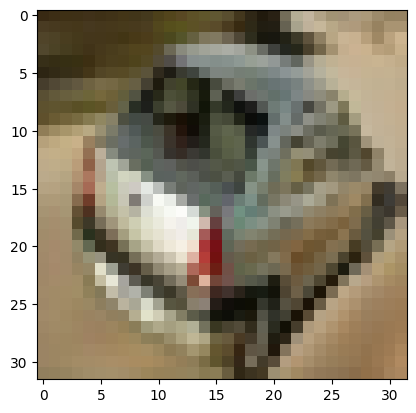

In [36]:
plt.imshow(data[282])

In [37]:
#convert image list and labels list to numpy arrays
X  = np.array(data)
Y = np.array(lables)

In [38]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


** Train-test split **

In [39]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [40]:
X_train.shape


(40000, 32, 32, 3)

In [41]:
print(Y_test.shape)

(10000,)


In [42]:
# scaling of the data
X_train = X_train/255.0
X_test = X_test/255.0

Building the Nueral Network

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_of_classes = 10

model = keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Flatten + Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_of_classes, activation='softmax')
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,786 (1.83 MB)

 Trainable params: 478,890 (1.83 MB)

 Non-trainable params: 896 (3.50 KB)

In [52]:
model.fit(X_train, Y_train, epochs = 50, validation_split = 0.1)

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8582 - loss: 0.4009 - val_accuracy: 0.8120 - val_loss: 0.5772
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8591 - loss: 0.3952 - val_accuracy: 0.8108 - val_loss: 0.5884
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8613 - loss: 0.3946 - val_accuracy: 0.7940 - val_loss: 0.6423
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8611 - loss: 0.3890 - val_accuracy: 0.8192 - val_loss: 0.5671
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8683 - loss: 0.3691 - val_accuracy: 0.8033 - val_loss: 0.6173
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8696 - loss: 0.3744 - val_accuracy: 0.8185 - val_loss: 0.5554
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8666 - loss: 0.3773 - val_accuracy: 0.7995 - val_loss: 0.6267
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8731 - loss: 0.3635 - 

ResNet50


In [51]:
from tensorflow.keras import Sequential,models, layers
from tensorflow.keras.layers import Dense ,Dropout ,Flatten, Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [53]:
conv_base = ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [54]:
conv_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [55]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10,activation='softmax'))

In [59]:
model.compile(optimizer = optimizers.RMSprop(learning_rate =2e-5), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [61]:
history = model.fit(X_train, Y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 429s 347ms/step - accuracy: 0.6514 - loss: 1.0439 - val_accuracy: 0.7533 - val_loss: 0.7479
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 385s 342ms/step - accuracy: 0.6885 - loss: 0.9526 - val_accuracy: 0.7635 - val_loss: 0.7114
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 384s 342ms/step - accuracy: 0.6970 - loss: 0.9110 - val_accuracy: 0.7717 - val_loss: 0.6895
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 385s 342ms/step - accuracy: 0.7137 - loss: 0.8743 - val_accuracy: 0.7785 - val_loss: 0.6588
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 385s 342ms/step - accuracy: 0.7264 - loss: 0.8356 - val_accuracy: 0.7837 - val_loss: 0.6392
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 385s 342ms/step - accuracy: 0.7430 - loss: 0.7946 - val_accuracy: 0.7950 - val_loss: 0.6135
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 385s 342ms/step - accuracy: 0.7480 - loss: 0.7799 - val_accuracy: 0.7980 - val_loss: 0.5999
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 385s 342ms/step - ac

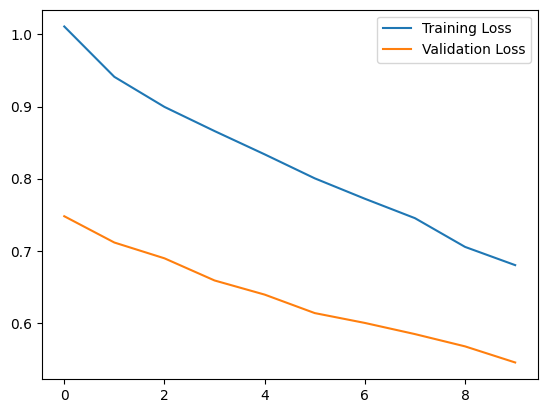

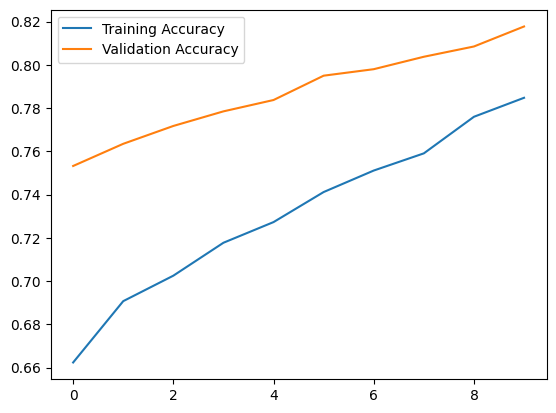

In [62]:
h = history

plt.plot(h.history['loss'],label = 'Training Loss')
plt.plot(h.history['val_loss'],label = 'Validation Loss')
plt.legend()
plt.show()

#plotting the accurracy loss
plt.plot(h.history['accuracy'],label = 'Training Accuracy')
plt.plot(h.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()
plt.show()